# STA141B FINAL GROUP PROJECT

## I. Import Data
- Grading 6 Data Extraction

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json,sys
import re
from matplotlib import pyplot as plt
import plotnine as p9
from plotnine import *
import sqlalchemy as sqla
import numpy as np

In [2]:
# web API,  parse HTML
url = 'https://datahub.io/core/covid-19#data-cli'
html_text = requests.get(url).text
soup = BeautifulSoup(html_text, 'html.parser')

In [3]:
html = []
df = {}
count = 1
for link in soup.find_all('a'):
    str_link = str(link.get('href'))
    
    if str_link.startswith('/core/covid-19/r/') and re.search('json$',str_link):
        html.append('https://datahub.io' + str_link)
        js = requests.get('https://datahub.io' + str_link).json() 
        df[count] =  pd.DataFrame(js)
        count += 1


In [4]:
html # so we have total 8 dataframe with using under data

['https://datahub.io/core/covid-19/r/countries-aggregated.json',
 'https://datahub.io/core/covid-19/r/key-countries-pivoted.json',
 'https://datahub.io/core/covid-19/r/reference.json',
 'https://datahub.io/core/covid-19/r/time-series-19-covid-combined.json',
 'https://datahub.io/core/covid-19/r/us_confirmed.json',
 'https://datahub.io/core/covid-19/r/us_deaths.json',
 'https://datahub.io/core/covid-19/r/us_simplified.json',
 'https://datahub.io/core/covid-19/r/worldwide-aggregate.json']

In [1]:
# df[1] # example: the 1st table

## II. World Trend Analysis

### A. Key Countries' Death Amount Analysis

First, let's have a look at the death trend through time in 8 key countreis: China, France, Germany, Iran, Italy, Spain, United States, United Kingdom.

For this part, we will use df2, or the data called key-countries-pivoted. Let's have a look at this data.

In [21]:
df[2]

,China,Date,France,Germany,Iran,Italy,Spain,US,United_Kingdom
0,548,2020-01-22,0,0,0,0,0,1,0
1,643,2020-01-23,0,0,0,0,0,1,0
2,920,2020-01-24,2,0,0,0,0,2,0
3,1406,2020-01-25,3,0,0,0,0,2,0
4,2075,2020-01-26,3,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...
671,111033,2021-11-23,7553513,5516623,6088009,4942135,5103315,47980780,9985879
672,111058,2021-11-24,7586146,5595674,6092822,4954585,5111842,48092052,10028829
673,111077,2021-11-25,7619656,5670253,6097672,4968341,5121100,48126574,10076116
674,111106,2021-11-26,7654128,5735837,6102056,4982022,5131012,48177907,10125945


In this dataset, we have 9 columns: the 8 key countries and one date column. The date goes from 2020-1-22 to 2021-11-27. 

This data's formet is not ideal for plotting, and we want a dataframe with all the 8 countries to be in one column. Thus, let's merge the data frame to get the suitable data frame for plotting. 

In [22]:
melt_key_country = pd.melt(df[2], id_vars=['Date'], 
               value_vars=['China','US','United_Kingdom','Italy','France','Germany','Spain','Iran'])
melt_key_country = melt_key_country.rename(columns={'variable':'country','value':'death'})
melt_key_country['death'] = pd.to_numeric(melt_key_country['death'],errors='coerce')
melt_key_country['Date'] = melt_key_country['Date'].astype(str)
melt_key_country['Date'] = pd.to_datetime(melt_key_country['Date'])
melt_key_country

,Date,country,death
0,2020-01-22,China,548
1,2020-01-23,China,643
2,2020-01-24,China,920
3,2020-01-25,China,1406
4,2020-01-26,China,2075
...,...,...,...
5403,2021-11-23,Iran,6088009
5404,2021-11-24,Iran,6092822
5405,2021-11-25,Iran,6097672
5406,2021-11-26,Iran,6102056


After merging, we get all countries in one column and have their corresponding date and death values. We can now continue to plot the time trend and do comparison. 

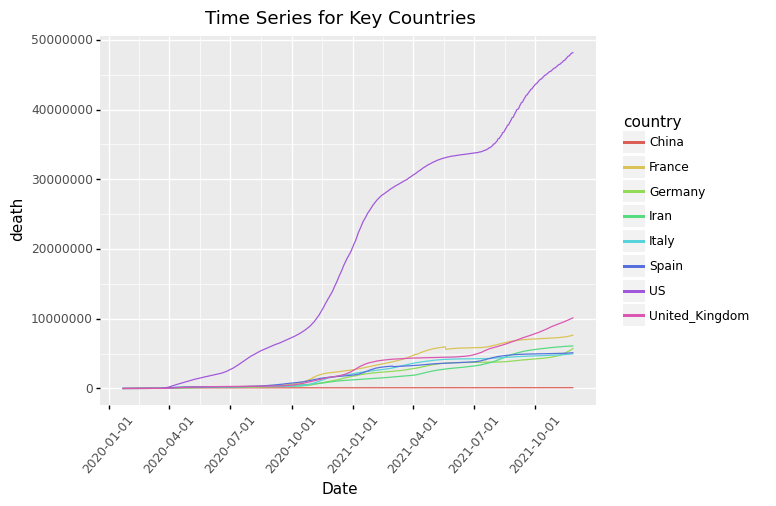

<ggplot: (8788143739513)>

In [23]:
(p9.ggplot(melt_key_country)
#+ p9.facet_wrap('~country',scales = 'free') 
+ p9.aes(x='Date',y='death',colour = 'country') 
+ p9.geom_line() 
+ p9.labs(title = 'Time Series for Key Countries')
+ p9.theme(axis_text_x = p9.element_text(angle=50))
)

From the plot, we can see that overall, the US has the largest number of death, and China has the smallest. US's death began to greatly increase beginning April, 2020. The steepest part of US's line is between around November, 2020 and Feburary, 2021, which means that this is the period with fastest death increase. The increasing rate tended to slow down in between March, 2021 to August, 2021. However, after August 2021, the death increasing rate again went up sharply. This would be due to the presence of delta variant. 



We can also see that before October 2020, the rest 7 countreis do not differ very much in death. After that, however, the rest 7 countreis except for China began to largely increase in death.  

### B. Death Cases vs. Confirmed Cases Worldwide

Besides visualizing key countries' death amount, we are also interested in finding out the death amount and confirmed amount globally. For this part, we will use df1, the dataset called countries-aggregated. Again, let's have a look of this data set. 

In [24]:
df[1]

,Confirmed,Country,Date,Deaths,Recovered
0,0,Afghanistan,2020-01-22,0,0
1,0,Afghanistan,2020-01-23,0,0
2,0,Afghanistan,2020-01-24,0,0
3,0,Afghanistan,2020-01-25,0,0
4,0,Afghanistan,2020-01-26,0,0
...,...,...,...,...,...
132491,133674,Zimbabwe,2021-11-23,4699,0
132492,133747,Zimbabwe,2021-11-24,4703,0
132493,133774,Zimbabwe,2021-11-25,4704,0
132494,133836,Zimbabwe,2021-11-26,4704,0


We want to use the ggplot to compare deaths and confirmed, so we will choose the column 'Confirmed' and 'Deaths' and merge them together by their corresponding date. Since we are interested in the worldwide cases, we will exclude the column 'Country'. Let's do the merging and look at the new data. 

In [26]:
countries_agg = df[1]
countries_agg['Date'] = pd.to_datetime(countries_agg['Date'].astype(str))
countries_agg['Deaths'] = pd.to_numeric(countries_agg['Deaths'],errors='coerce')
countries_agg['Confirmed'] = pd.to_numeric(countries_agg['Confirmed'],errors='coerce')
melt_countries_agg = pd.melt(countries_agg, id_vars=['Date'], 
               value_vars=['Confirmed','Deaths'])
melt_countries_agg = melt_countries_agg.rename(columns={'variable':'case'})
melt_countries_agg

,Date,case,value
0,2020-01-22,Confirmed,0
1,2020-01-23,Confirmed,0
2,2020-01-24,Confirmed,0
3,2020-01-25,Confirmed,0
4,2020-01-26,Confirmed,0
...,...,...,...
264987,2021-11-23,Deaths,4699
264988,2021-11-24,Deaths,4703
264989,2021-11-25,Deaths,4704
264990,2021-11-26,Deaths,4704


Now, we have our confirmed cases and death cases in one column. So we will use Plotnine to draw their trend through time. We will color the two different cases so we can clearly compare them. 

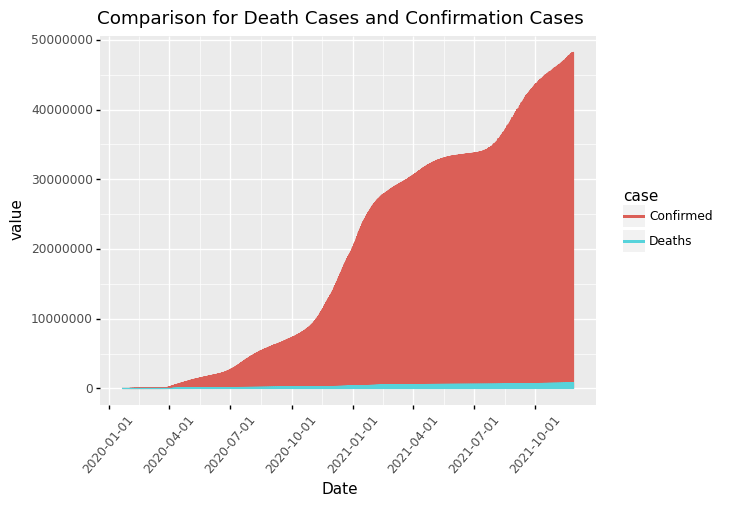

<ggplot: (8788144113722)>

In [6]:
(p9.ggplot(melt_countries_agg) 
+ p9.aes(x='Date',y='value',colour = 'case') 
+ p9.geom_line() 
+ p9.labs(title = 'Comparison for Death Cases and Confirmation Cases')
+ p9.theme(axis_text_x = p9.element_text(angle=50))
)

From the plot, we can see that overall, confirmed cases is much more larger than death cases. We can thus conclude that although COVID-19 is highly contagious, it does not cause a super high fatality rate. 

#### C. Worldwide Increasing Rate Analysis

We are now interested in finding out the increasing rate of COVID through time. We will accomplish this by drawing a plot with date as the x-axis, confirmed cases as the first y-axis, and incresing rate as the secondary y-axis. We will use df8 in this part, which is called worldwide-aggregate. 

In [27]:
df[8]

,Confirmed,Date,Deaths,Increase rate,Recovered
0,557,2020-01-22,17,NaN,30
1,655,2020-01-23,18,17.594255,32
2,941,2020-01-24,26,43.664122,39
3,1434,2020-01-25,42,52.391073,42
4,2118,2020-01-26,56,47.698745,56
...,...,...,...,...,...
671,258794189,2021-11-23,5166129,0.234979,0
672,259465151,2021-11-24,5174661,0.259265,0
673,260064469,2021-11-25,5182449,0.230982,0
674,260658768,2021-11-26,5189402,0.228520,0


In [9]:
worldwide = df[8]
worldwide['Confirmed'] = pd.to_numeric(worldwide['Confirmed'],errors='coerce')
worldwide['Increase rate'] = pd.to_numeric(worldwide['Increase rate'],errors='coerce')
worldwide['Date'] = worldwide['Date'].astype(str)
worldwide['Date'] = pd.to_datetime(worldwide['Date'])

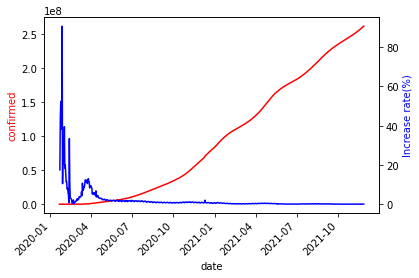

In [39]:
x = worldwide['Date']
y1 = worldwide['Confirmed']
y2 = worldwide['Increase rate']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'r-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('date')
ax1.set_ylabel('confirmed', color='r')
ax2.set_ylabel('Increase rate(%)', color='b')
fig.autofmt_xdate(rotation=45)
plt.show()

From this plot, it can be interpreted that although confimed cases continue to grow, we are actually having a much lower increasing rate. At the beginning 2020, we had a sudden fall in increasing rate. Although the rate increased again in around April, it did not go high and fell again after April. Until now, we had a very stable and low increasing rate. 

## III. US Analysis


- G4 Data Munging

After analyzing COVID-19 worldwide, we will now focus on the change of pandapic in the US. We will use the data called us_confirmed and us_deaths to represent the confirmed and death cases in the US.   
Since we want to analyze death cases and confirmed cases together, we will join these two dataset together, which called us_simplified for easier use. 

In [11]:
# remove country name since we're now foucse on the domestic changes.
us_confirmed = df[5].drop('Country/Region', 1).rename(columns={"Case": "Confirmed"})
us_deaths = df[6].drop('Country/Region', 1).rename(columns={"Case": "Deaths"})

In [41]:
us_simplified = us_confirmed.merge(us_deaths,how='left', 
                                   left_on=['Date','Province/State','Admin2'], 
                                   right_on = ['Date','Province/State','Admin2'])
us_simplified

,Admin2,Case,Date,Province/State,Deaths
0,Autauga,0,2020-01-22,Alabama,0
1,Autauga,0,2020-01-23,Alabama,0
2,Autauga,0,2020-01-24,Alabama,0
3,Autauga,0,2020-01-25,Alabama,0
4,Autauga,0,2020-01-26,Alabama,0
...,...,...,...,...,...
2259187,Weston,1189,2021-11-23,Wyoming,13
2259188,Weston,1189,2021-11-24,Wyoming,13
2259189,Weston,1189,2021-11-25,Wyoming,13
2259190,Weston,1189,2021-11-26,Wyoming,13


We can see many of the descriptive statistics cases with the ``describe`` method.

In [40]:
us_simplified.describe()

,Confirmed,Deaths
count,2.259192e+06,2.259192e+06
mean,5.869134e+03,1.079996e+02
std,2.745347e+04,5.331087e+02
min,0.000000e+00,0.000000e+00
25%,4.900000e+01,0.000000e+00
50%,7.910000e+02,1.400000e+01
75%,3.277000e+03,6.000000e+01
max,1.524912e+06,2.712100e+04


Above is the summary for all states in the US. We now want to see top 10 states that has the highest death cases and confirmed cases. Since our data list deaths and confirmations separately by date, we need to sum them together to get the total number through *groupby* in pandas. We will order the number of cases by decreasing order.

In [13]:
# XU
death_us = us_simplified.groupby(['Province/State']).agg({'Deaths':'sum'})
death_us = death_us.reset_index() #G4--index
us_top10 = death_us.sort_values([ 'Deaths'], ascending=False).groupby('Province/State').head(10)[0:10]
us_top10

,Province/State,Deaths
36,New York,25536282
5,California,22802546
49,Texas,20464860
11,Florida,15852926
34,New Jersey,12376219
43,Pennsylvania,10819505
17,Illinois,10453194
12,Georgia,8404271
26,Michigan,8388556
40,Ohio,7990288


We can see that New York has the greatest number of death cases in the US.

Let's do the same for confirmation.

In [14]:
confirmed_us = us_simplified.groupby(['Province/State']).agg({'Confirmed':'sum'})
confirmed_us = confirmed_us.reset_index() #G4--index
us_top10c = confirmed_us.sort_values([ 'Confirmed'], ascending=False).groupby('Province/State').head(10)[0:10]
us_top10c

,Province/State,Confirmed
5,California,1510202978
49,Texas,1207517775
11,Florida,989147867
36,New York,802359200
17,Illinois,542520237
12,Georgia,464350200
43,Pennsylvania,443930262
40,Ohio,425563911
37,North Carolina,398081662
34,New Jersey,384812765


Then, we will join the two table to get countries that are in both of the top 10 lists. Those countries will be the ones with both top serious deaths and confirmations.

In [15]:
us_top10.merge(us_top10c,on='Province/State') #join data

,Province/State,Deaths,Confirmed
0,New York,25536282,802359200
1,California,22802546,1510202978
2,Texas,20464860,1207517775
3,Florida,15852926,989147867
4,New Jersey,12376219,384812765
5,Pennsylvania,10819505,443930262
6,Illinois,10453194,542520237
7,Georgia,8404271,464350200
8,Ohio,7990288,425563911


Thus, now we know that California has the greatest confirmed cases in the US. 
We can also obtain a plot to see how the covid-19 confirm cases change in a time series.

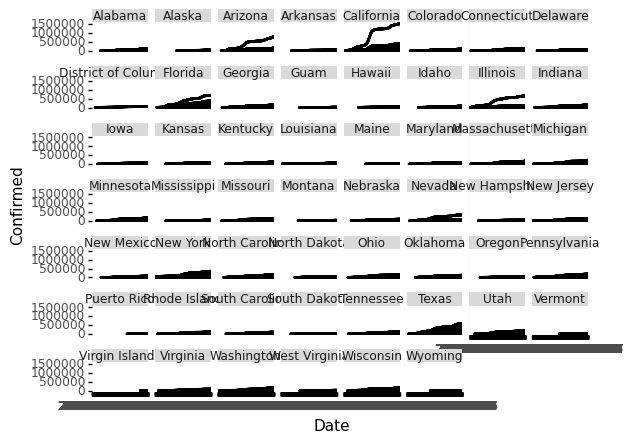

<ggplot: (8788039735694)>

In [44]:
gg = ggplot(high)
gg += p9.facet_wrap('Province/State')  
gg += p9.aes(x='Date', y='Confirmed')
gg += geom_point(size = 0.1)
gg

We can see that California has the largest slope of incresing the data, which means California has the fastest rate of increasing confirmed case. 
To get into more detail of California, we will import a new dataset of the Vaccine accepted in Califorlia. Seeing if there is a relationship between the vaccine_accepted rate and confirmed_case. 

# Thus, we can conclude that New York, California, Texas, Florida, New Jersey, Pennsylvania, Illinois, Georgia, and Ohio are the states with most serious Covid-19 problems. 

In [43]:
#high = us_simplified[(us_simplified['Confirmed'] >= 3.241000e+03) 
#                     & (us_simplified['Deaths'] >= 6.000000e+01)]
#high

## IV. California Analysis
#### California vaccine data. 

In this part, we will use the new data frame 'Statewide COVID-19 Vaccines Administered By County'. 
Let's read the data in chunks and get its basic information.

Becase the dataset is updated everyday by CA goverment, so we would like to use the WEB API directly to get the lasted data. 

In [67]:
vac = pd.read_csv('https://data.chhs.ca.gov/dataset/e283ee5a-cf18-4f20-a92c-ee94a2866ccd/resource/130d7ba2-b6eb-438d-a412-741bde207e1c/download/covid19vaccinesbycounty.csv',
                  chunksize=10000)

vac_chunk = next(vac)
vac_chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   county                          10000 non-null  object
 1   administered_date               10000 non-null  object
 2   total_doses                     10000 non-null  int64 
 3   cumulative_total_doses          10000 non-null  int64 
 4   pfizer_doses                    10000 non-null  int64 
 5   cumulative_pfizer_doses         10000 non-null  int64 
 6   moderna_doses                   10000 non-null  int64 
 7   cumulative_moderna_doses        10000 non-null  int64 
 8   jj_doses                        10000 non-null  int64 
 9   cumulative_jj_doses             10000 non-null  int64 
 10  partially_vaccinated            10000 non-null  int64 
 11  total_partially_vaccinated      10000 non-null  int64 
 12  fully_vaccinated                10000 non-null 

Then, we will append the data to sql sqlite through chunks. 

In [68]:
sqlite_file = 'vac_sql.sqlite'
vac_sql = sqla.create_engine('sqlite:///' + sqlite_file)
vac_chunk.to_sql('vac',vac_sql,if_exists='replace')
for vac_chunk in vac:
    vac_chunk.to_sql('vac',vac_sql,if_exists='append')
pd.read_sql_query("select count(*) from vac",vac_sql)

,count(*)
0,30318


We have now appended all columns into our sql sqlite. Next, lets have a look at the amount of cumulative fully vaccinated population in CA counties through time. We will use sql commend to select the date column and cumulative fully vaccination column in CA counties and group by date.

In [74]:
sql_query = """
select administered_date,cumulative_fully_vaccinated from vac 
where county = 'All CA Counties' 
group by administered_date
"""
CA_vac_time = pd.read_sql_query(sql_query,vac_sql)
CA_vac_time

,administered_date,cumulative_fully_vaccinated
0,2020-07-27,0
1,2020-07-28,1
2,2020-07-29,1
3,2020-07-30,2
4,2020-07-31,2
...,...,...
484,2021-11-24,24997661
485,2021-11-25,24998505
486,2021-11-26,25020011
487,2021-11-27,25042646


Let's visualize the time series to see vaccination trend. 

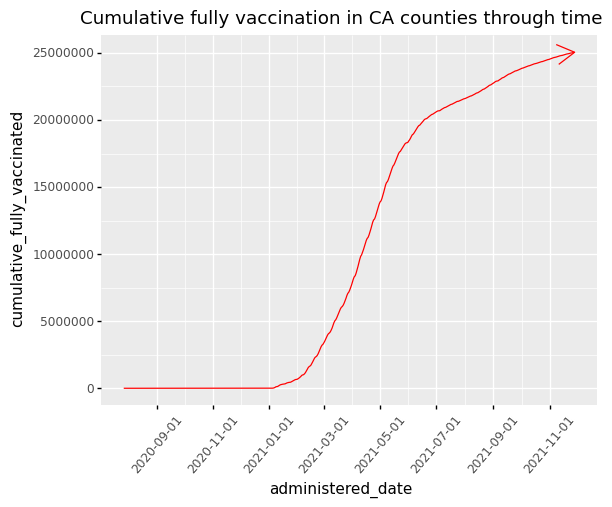

<ggplot: (8788013996782)>

In [79]:
CA_vac_time['administered_date'] = pd.to_datetime(CA_vac_time['administered_date'].astype(str))
(p9.ggplot(CA_vac_time) 
+ p9.aes(x='administered_date',y='cumulative_fully_vaccinated') 
+ p9.geom_line(arrow = arrow(),color='red') 
+ p9.labs(title = 'Cumulative fully vaccination in CA counties through time')
+ p9.theme(axis_text_x = p9.element_text(angle=50))
)

From the plot, it can be interpreted that during Feburary 2021 and July 2021, the increasing rate of getting full vaccination is maximal among all time periods. 

In [2]:
vac_url  = 'https://data.chhs.ca.gov/dataset/e283ee5a-cf18-4f20-a92c-ee94a2866ccd/resource/130d7ba2-b6eb-438d-a412-741bde207e1c/download/covid19vaccinesbycounty.csv'
vac_data = pd.read_csv(vac_url)
California_simplified = us_simplified[us_simplified['Province/State'] == 'California']
# California_simplified

NameError: name 'pd' is not defined

We will combine confirmed & Deaths with the vaccine data in the Date and county name. We also want to observe the data change with a time series. As we mentioned before, the date range of this dataset is very large, so we will summarize time series data by month. 

In [28]:
vaccine = California_simplified.merge(vac_data,how='inner', left_on=['Date','Admin2'], 
                   right_on = ['administered_date','county'])
us_confirmed = df[5].drop('Country/Region', 1)
vaccine = vaccine.drop(['administered_date','Admin2','Province/State','california_flag'],1)

,Confirmed,Date,Deaths,county,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,booster_recip_count,cumulative_booster_recip_count
0,10689,2020-07-27,176,Alameda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10922,2020-07-28,180,Alameda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11225,2020-07-29,180,Alameda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11356,2020-07-30,185,Alameda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11537,2020-07-31,187,Alameda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28299,10697,2021-11-23,88,Yuba,236,73110,60,30051,142,38447,13,4246,60,3936,33,34084,65,38020,141,4834
28300,10700,2021-11-24,88,Yuba,218,73328,83,30134,108,38555,12,4258,41,3928,56,34140,48,38068,121,4955
28301,10700,2021-11-25,88,Yuba,1,73329,0,30134,1,38556,0,4258,0,3928,0,34140,0,38068,1,4956
28302,10700,2021-11-26,88,Yuba,150,73479,37,30171,96,38652,6,4264,31,3925,37,34177,34,38102,80,5036


In [29]:
# group data with county and timefrequency(month)
vaccine['Date'] = pd.to_datetime(vaccine['Date'].astype(str)).values
month = vaccine.groupby(['county',pd.Grouper(key = 'Date',freq='M')]).sum()
month

Confirmed  Deaths  total_doses  cumulative_total_doses  \
county  Date                                                                 
Alameda 2020-07-31      55729     908            0                       0   
        2020-08-31     470022    6770           30                     353   
        2020-09-30     585066    9385           48                    1703   
        2020-10-31     703279   12207            8                    2600   
        2020-11-30     800147   13066           12                    2728   
...                       ...     ...          ...                     ...   
Yuba    2021-07-31     201429    1592         3880                 1558303   
        2021-08-31     233483    1610         5796                 1710093   
        2021-09-30     273721    1798         5534                 1833347   
        2021-10-31     310058    2377         4383                 2041573   
        2021-11-30     285633    2307         5466                 1918773   

                    pfizer_doses  cumulative_pfizer_doses  moderna_doses  \
county  Date                                                               
Alameda 2020-07-31             0                        0              0   
        2020-08-31            28                      329              2   
        2020-09-30            46                     1606              2   
        2020-10-31             7                     2464              1   
        2020-11-30             6                     2506              2   
...                          ...                      ...            ...   
Yuba    2021-07-31          2238                   564482           1335   
        2021-08-31          3382                   652004           2096   
        2021-09-30          3262                   735492           1999   
        2021-10-31          2431                   849835           1789   
        2021-11-30          1695                   794763           3161   

                    cumulative_moderna_doses  jj_doses  cumulative_jj_doses  \
county  Date                                                                  
Alameda 2020-07-31                         0         0                    0   
        2020-08-31                        24         0                    0   
        2020-09-30                        97         0                    0   
        2020-10-31                       136         0                    0   
        2020-11-30                       172         4                   50   
...                                      ...       ...                  ...   
Yuba    2021-07-31                    896571       307                96816   
        2021-08-31                    950381       317               107253   
        2021-09-30                    985092       270               112274   
        2021-10-31                   1068411       162               122753   
        2021-11-30                   1006726       234               112260   

                    partially_vaccinated  total_partially_vaccinated  \
county  Date                                                           
Alameda 2020-07-31                     0                           0   
        2020-08-31                    28                         349   
        2020-09-30                    13                         476   
        2020-10-31                     4                         165   
        2020-11-30                     7                         218   
...                                  ...                         ...   
Yuba    2021-07-31                  2021                      101488   
        2021-08-31                  3263                      140431   
        2021-09-30                  2055                      138142   
        2021-10-31                  1171                      118560   
        2021-11-30                  1183                      101397   

                    fully_vaccinated  cumulative_fu

In [30]:
vac_conn = sqla.create_engine('sqlite:///../data/vaccine.sqlite')
# vac_vaccine.to_sql('vaccine',vac_conn,if_exists='append')
month.to_sql('vaccine',vac_conn,if_exists='append')

In [31]:
# observe the correlation of fully_vaccinated rate and  confirmed & deaths rate
fully_vac = pd.read_sql_query("select county,confirmed,deaths,fully_vaccinated,Date from vaccine group by county,Date", vac_conn)
fully_vac

,county,Confirmed,Deaths,fully_vaccinated,Date
0,Alameda,55729,908,0,2020-07-31 00:00:00.000000
1,Alameda,470022,6770,2,2020-08-31 00:00:00.000000
2,Alameda,585066,9385,35,2020-09-30 00:00:00.000000
3,Alameda,703279,12207,4,2020-10-31 00:00:00.000000
4,Alameda,800147,13066,4,2020-11-30 00:00:00.000000
...,...,...,...,...,...
981,Yuba,201429,1592,1834,2021-07-31 00:00:00.000000
982,Yuba,233483,1610,2383,2021-08-31 00:00:00.000000
983,Yuba,273721,1798,3107,2021-09-30 00:00:00.000000
984,Yuba,310058,2377,1791,2021-10-31 00:00:00.000000


In [32]:
county = fully_vac['county'].unique()

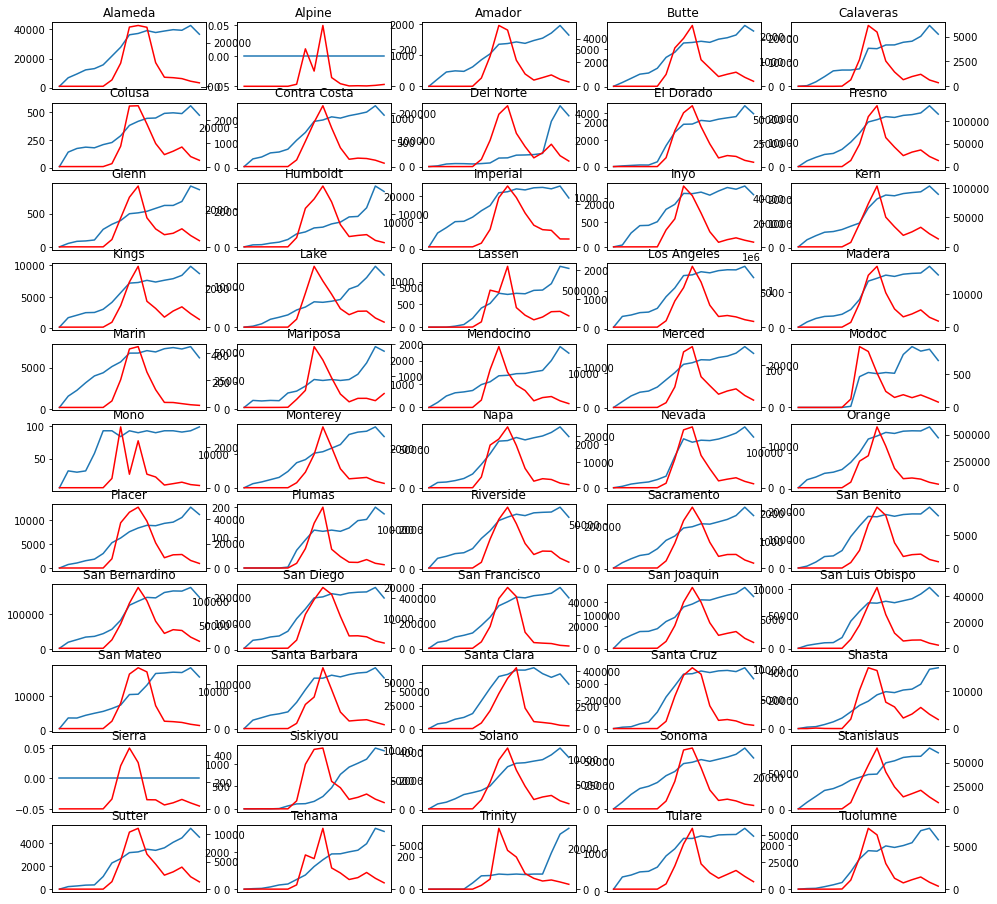

In [33]:
fig, ax= plt.subplots(11,5, figsize=(16,16))

for i in range(11):
    for j in range(5):
        ax[i,j].plot(fully_vac[fully_vac['county']==county[i*5+j]]['Date'],
                     fully_vac[fully_vac['county']==county[i*5+j]]['Deaths'])
#         ax[i,j].secondary_yaxis(fully_vac[fully_vac['county']==county[i*5+j]]['fully_vaccinated'])

        ax[i,j].axes.xaxis.set_visible(False)
        ax[i,j].set_title(county[i*5+j])
        
        axx = ax[i,j].twinx()
        axx.plot(fully_vac[fully_vac['county']==county[i*5+j]]['Date'],
                        fully_vac[fully_vac['county']==county[i*5+j]]['fully_vaccinated'],
                color='red')
#         lns2 = axx.axes.xaxis.set_visible(False)
#         fig.tight_layout()
#         plt.show()


In [ ]:
# red line is vaccine accepted rate, blue line is death rate

furthermore可探讨问题:
1. booster shoot对covid有没有影响
2. 